### Project 2 - Deep Learning: Image Classification

**Developer:** Ryan Parks

**Course**: Artificial Intelligence Applications

**Semester:** Summer 2024

**Program requirements:**

1. Describe **Deep Learning**
2. Describe **Neural Networks**
3. Install necessary modules/packages
4. Import required dataset
5. Analyze images
6. Build and train *convolution neural network* **(CNN)** to *classify* images

**Note:** In each of the following examples, research the functions/properties/options indicated.

**Introduction to Convolutional Neural 

### Regression Analysis

**Goal:** Find the best fitting line which can accurately predict the output.

**Fundamentals:**

Dependent variables are always the one being studied -- that is, whose variation(s) is/are being modified somehow!

Independent variables are always the ones being manipulated to study and compare the effects of the dependent variables.

**Note:** The designations *independent* and *dependent* variables are used to not imply "cause and effect" (as do "predictor" or "explanatory" terms).

**Note:** Linear regression has 3 types:

1. Simple linear regression
2. Multiple linear regression
3. Multivariate linear regression

**Simple linear regression**: Only one independent variable affecting one dependent variable.

**Multiple linear regression**: Two or more independent variables affecting one dependent variable.

**Multivariate linear regression**: Two or more independent variables affecting two or more dependent variables.

#### Correlation Does ***Not*** Imply Causation!

## **Famous Example:** Ice cream consumption causes shark attacks??!!

**WHAT?!!**

**ANOTHER REASON NOT TO EAT ICE CREAM?!!**

**Truth:** Ice cream sales and monthly shark attacks around the United States each year are highly correlated.

**REALITY:** More people consume ice cream and go into waters where sharks are located -- when it's warmer outside!!

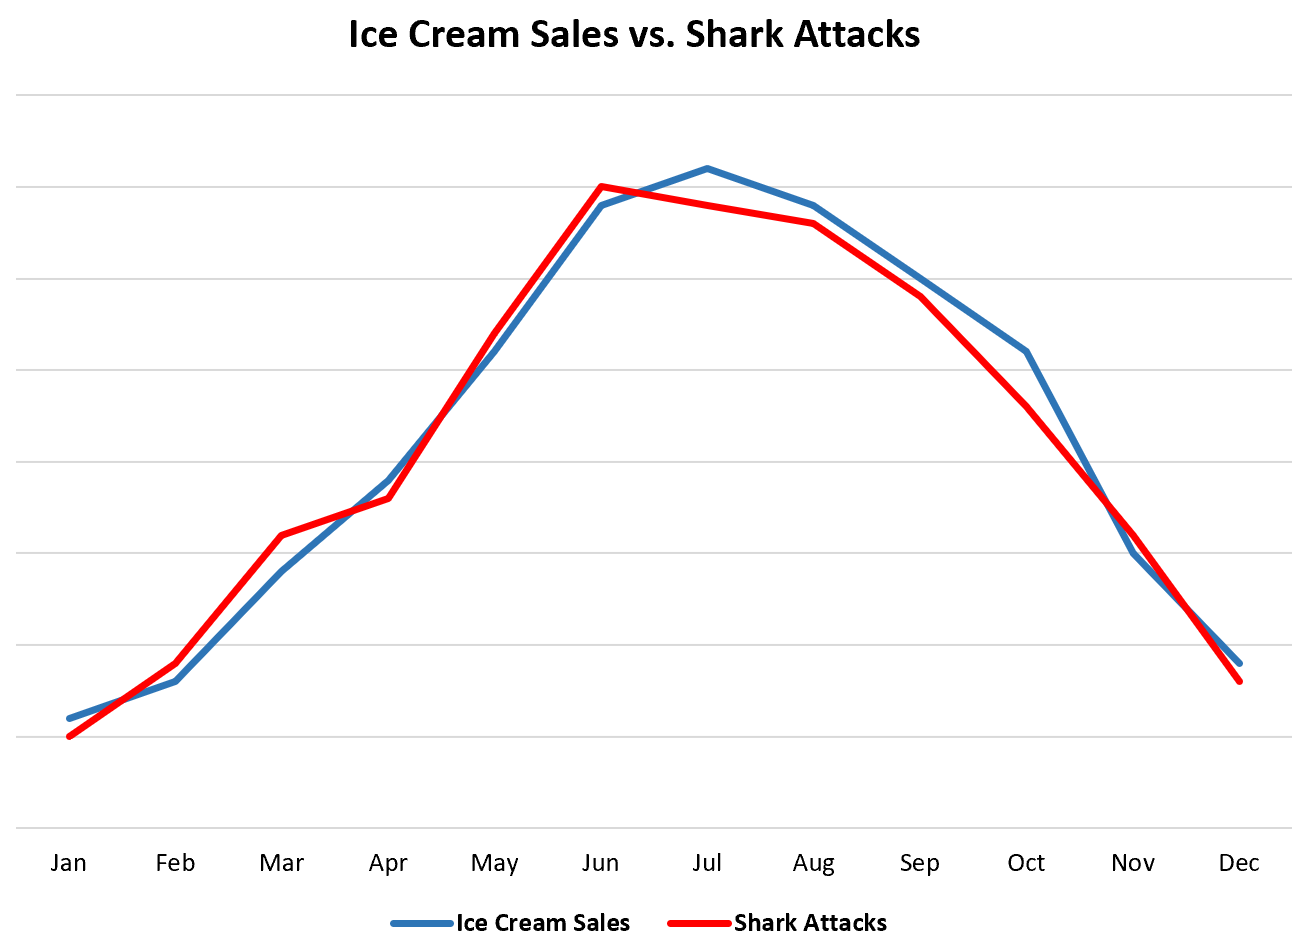

Figure 1. https://www.statology.org/correlation-does-not-imply-causation-examples/

## Supervised vs Unsupervised Learning

- Supervised learning: prior knowledge of what output values for samples should be.
- Unsupervised learning: does not have labeled outputs. Goal is to infer natural structure present within a set of data points.

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Get data

In [2]:
fish = pd.read_csv('fish.csv')

fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Clean data

In [3]:
fish.rename(columns={'Length1':'VerticalLength',
                     'Length2':'DiagonalLength',
                     'Length3':'CrossLength'}, inplace=True)

fish.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Analyze dataset

In [4]:
fish.shape

(159, 7)

In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   VerticalLength  159 non-null    float64
 3   DiagonalLength  159 non-null    float64
 4   CrossLength     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish_describe = fish.describe()

pd.options.display.float_format = "{:,.2f}".format

print(fish_describe)

        Weight  VerticalLength  DiagonalLength  CrossLength  Height  Width
count   159.00          159.00          159.00       159.00  159.00 159.00
mean    398.33           26.25           28.42        31.23    8.97   4.42
std     357.98           10.00           10.72        11.61    4.29   1.69
min       0.00            7.50            8.40         8.80    1.73   1.05
25%     120.00           19.05           21.00        23.15    5.94   3.39
50%     273.00           25.20           27.30        29.40    7.79   4.25
75%     650.00           32.70           35.50        39.65   12.37   5.58
max   1,650.00           59.00           63.40        68.00   18.96   8.14


## Identify correlations

In [7]:
fish.corr(numeric_only = True).head()

,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
Weight,1.00,0.92,0.92,0.92,0.72,0.89
VerticalLength,0.92,1.00,1.00,0.99,0.63,0.87
DiagonalLength,0.92,1.00,1.00,0.99,0.64,0.87
CrossLength,0.92,0.99,0.99,1.00,0.70,0.88
Height,0.72,0.63,0.64,0.70,1.00,0.79


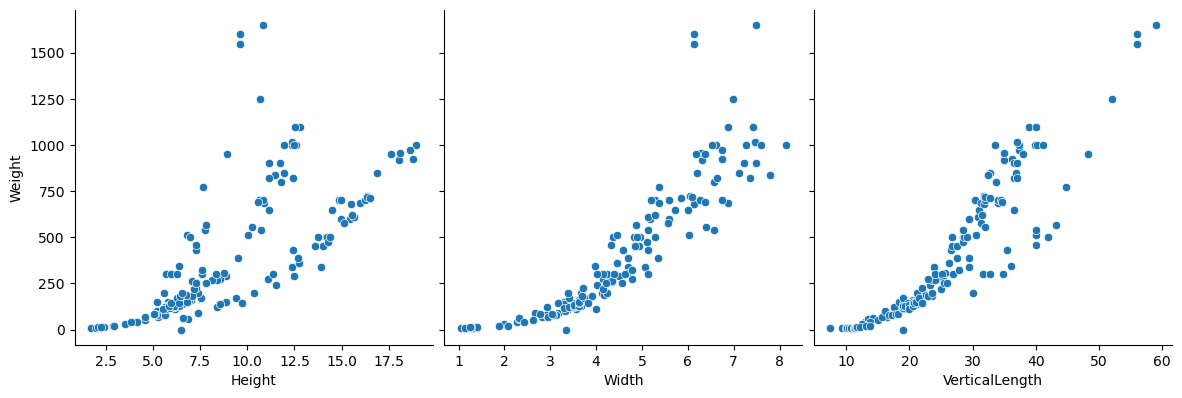

In [8]:
sns.pairplot(fish, x_vars=['Height', 'Width', 'VerticalLength'], y_vars='Weight', height=4, aspect=1, kind='scatter')
plt.show()

In [9]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [11]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


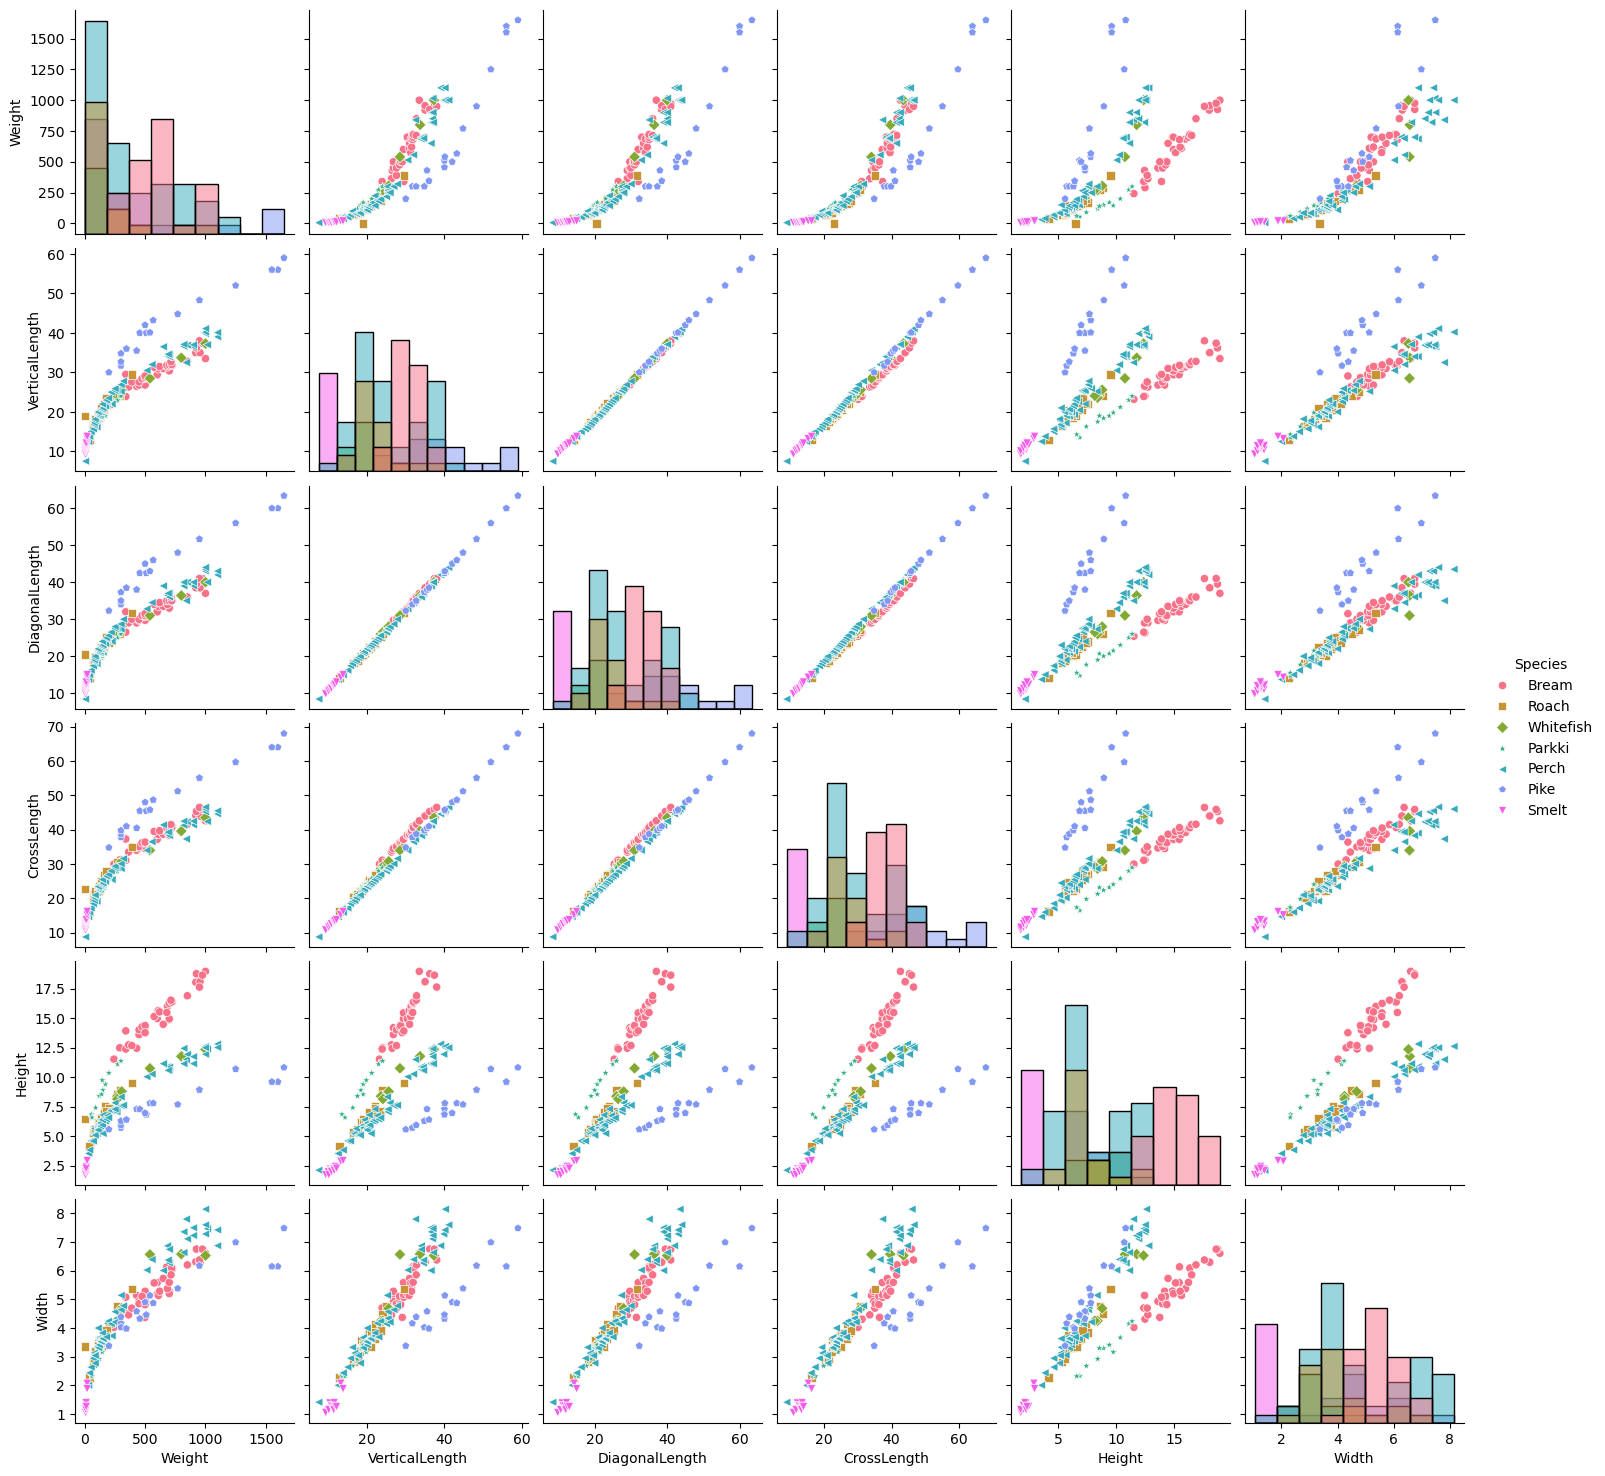

In [12]:
sns.pairplot(fish, hue="Species", diag_kind="hist", markers=["o", "s", "D", "*", "<", "p", "v" ], palette = "husl")

In [13]:
fish.corr(numeric_only = True)[['Weight']].sort_values(by='Weight', ascending=False)

,Weight
Weight,1.00
CrossLength,0.92
DiagonalLength,0.92
VerticalLength,0.92
Width,0.89
Height,0.72


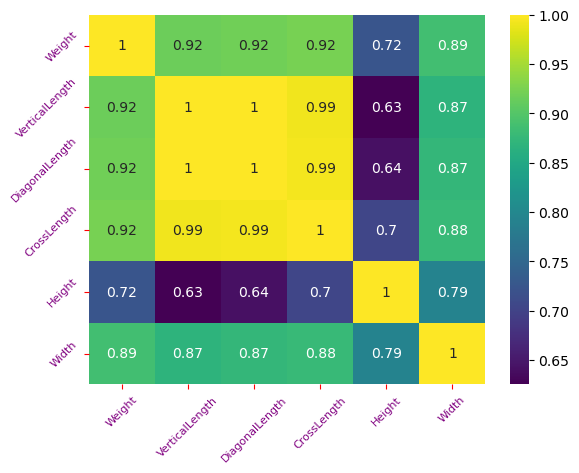

In [14]:
ax=sns.heatmap(data=fish.corr(numeric_only = True), annot=True, cmap='viridis')
ax.tick_params(axis='both', rotation=45, labelsize=8, labelcolor='purple', color='red')

<Axes: >

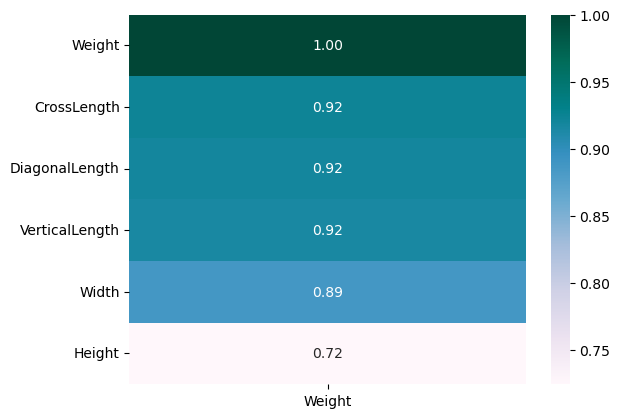

In [15]:
sns.heatmap(data=fish.corr(numeric_only = True)[['Weight']].sort_values(by='Weight', ascending=False), annot=True, cmap='PuBuGn', fmt=f'.2f')

# Create multiple regression model

## Multiple Regression Steps

1. Identify x (IVs) and y (DV): x=Height,Width,VerticalLength, y=Weight
2. Create Train and Test datasets
3. Train model
4. Evaluate model

In [16]:
bream = fish.query('Species == "Bream"')

In [17]:
x = bream[['Height', 'Width', 'VerticalLength']]
y = bream[['Weight']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 100)

In [19]:
x_train

,Height,Width,VerticalLength
6,14.18,5.28,26.80
9,14.23,4.96,28.50
19,14.47,5.73,31.00
0,11.52,4.02,23.20
27,16.52,5.85,32.70
12,13.76,4.37,29.10
11,14.37,4.81,28.70
4,12.44,5.13,26.50
29,18.96,6.60,33.50
28,16.89,6.20,32.80


In [20]:
y_train/454

,Weight
6,1.10
9,1.10
19,1.43
0,0.53
27,1.57
12,1.10
11,1.10
4,0.95
29,2.20
28,1.87


## Fitting model: Find best fitting line -- to accurately predict output

In [21]:
model = LinearRegression().fit(x_train, y_train)

In [22]:
model.score(x_test, y_test)

0.9274190509163558

In [23]:
y_predicted = model.predict(x_test)

predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

predicted

,PredictedWeight
0,"1,009.39"
1,942.34
2,913.70
3,454.27
4,311.13
5,524.23
6,645.65
7,996.23
8,757.77


In [24]:
x_test

,Height,Width,VerticalLength
33,18.64,6.75,37.40
34,17.62,6.37,38.00
31,18.08,6.29,35.00
5,13.60,4.93,26.80
1,12.48,4.31,24.00
13,13.91,5.07,29.50
18,15.63,5.13,30.90
32,18.75,6.75,36.20
26,16.36,6.09,32.00


In [25]:
y_test

,Weight
33,975.00
34,950.00
31,955.00
5,450.00
1,290.00
13,340.00
18,610.00
32,925.00
26,720.00


In [26]:
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])

final

,PredictedWeight,Height,Width,VerticalLength,Weight
0,"1,009.39",18.64,6.75,37.40,975.00
1,942.34,17.62,6.37,38.00,950.00
2,913.70,18.08,6.29,35.00,955.00
3,454.27,13.60,4.93,26.80,450.00
4,311.13,12.48,4.31,24.00,290.00
5,524.23,13.91,5.07,29.50,340.00
6,645.65,15.63,5.13,30.90,610.00
7,996.23,18.75,6.75,36.20,925.00
8,757.77,16.36,6.09,32.00,720.00


## Residuals

- R2 value returned by score() method for test dataset provides good indication of regression model validity.
- Also, plotting residuals helps to evaluate models.

In [27]:
final['Residual'] = final.Weight - final.PredictedWeight

final

,PredictedWeight,Height,Width,VerticalLength,Weight,Residual
0,"1,009.39",18.64,6.75,37.40,975.00,-34.39
1,942.34,17.62,6.37,38.00,950.00,7.66
2,913.70,18.08,6.29,35.00,955.00,41.30
3,454.27,13.60,4.93,26.80,450.00,-4.27
4,311.13,12.48,4.31,24.00,290.00,-21.13
5,524.23,13.91,5.07,29.50,340.00,-184.23
6,645.65,15.63,5.13,30.90,610.00,-35.65
7,996.23,18.75,6.75,36.20,925.00,-71.23
8,757.77,16.36,6.09,32.00,720.00,-37.77


<Axes: xlabel='Residual', ylabel='Density'>

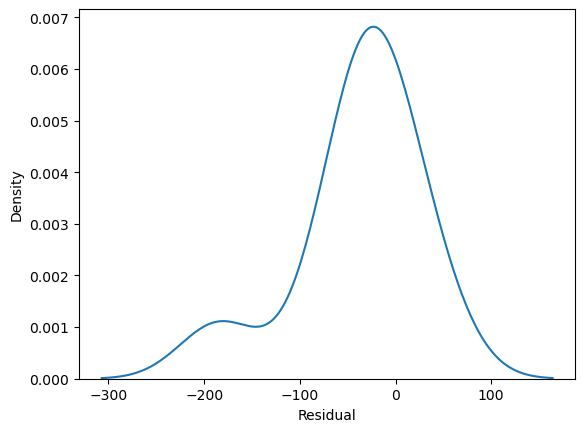

In [28]:
sns.kdeplot(data=final, x='Residual')